# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=sharing

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio
- TV, Jornal e Rádio estão em milhares de reais
- Vendas estão em milhões

#### Importar a Base de dados

In [41]:
import pandas as pd

df = pd.read_csv('advertising.csv')
display(df)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

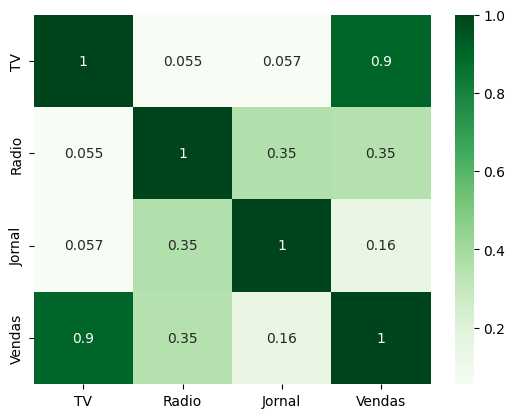

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(df.corr(),cmap='Greens',annot=True)
plt.show()

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [43]:
y = df["Vendas"]
x = df[['TV','Radio','Jornal']]

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size= 0.3, random_state=1)



#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [ ]:
# Importando o modelo
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Criando o modelo
modelo_reg_linear = LinearRegression()
modelo_arv_dec = RandomForestRegressor()

# Treinar o modelo
modelo_reg_linear.fit(x_treino, y_treino)
modelo_arv_dec.fit(x_treino, y_treino)

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [ ]:
previsao_reg_linear = modelo_reg_linear.predict(x_teste)
previsao_arv_decisao = modelo_arv_dec.predict(x_teste)

In [46]:
from sklearn.metrics import r2_score

print(r2_score(y_teste, previsao_reg_linear))
print(r2_score(y_teste, previsao_arv_decisao))

0.9071151423684273
0.9628932356594229


#### Visualização Gráfica das Previsões

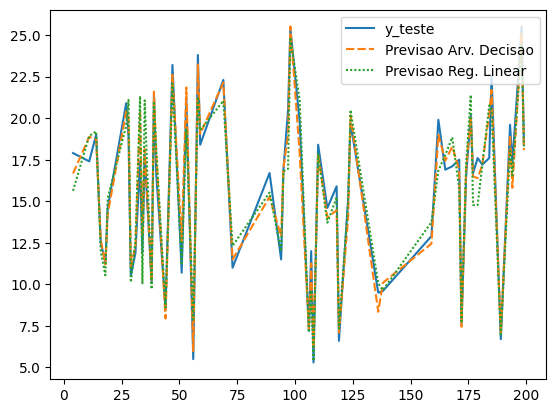

In [49]:
tabela_aux = pd.DataFrame()
tabela_aux['y_teste'] = y_teste
tabela_aux['Previsao Arv. Decisao'] = previsao_arv_decisao
tabela_aux['Previsao Reg. Linear'] = previsao_reg_linear

sns.lineplot(tabela_aux)
plt.show()

#### Como fazer uma nova previsão?

In [51]:
novos_dados = pd.read_csv('novos.csv')
nova_prev = modelo_arv_dec.predict(novos_dados)
nova_prev

array([ 7.57 ,  8.759, 19.631])